 Handwritten Digit Classification(마치 전처리과정)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle
%matplotlib inline

digit1 = cPickle.load(open('data_files/mnist_digit_1.pkl', 'rb'))
digit0 = cPickle.load(open('data_files/mnist_digit_0.pkl', 'rb'))

In [28]:
digit1[0].shape

(28, 28)

In [29]:
digit0[1].shape

(28, 28)

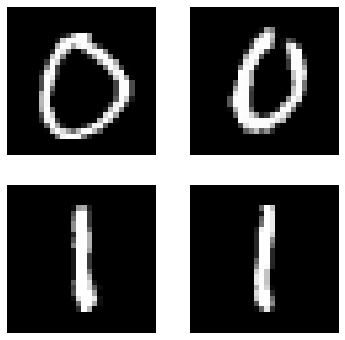

In [30]:
plt.figure(figsize = (6, 6))
plt.subplot(2,2,1), plt.imshow(digit0[np.random.randint(200)], 'gray'), plt.axis('off')
plt.subplot(2,2,2), plt.imshow(digit0[np.random.randint(200)], 'gray'), plt.axis('off')
plt.subplot(2,2,3), plt.imshow(digit1[np.random.randint(200)], 'gray'), plt.axis('off')
plt.subplot(2,2,4), plt.imshow(digit1[np.random.randint(200)], 'gray'), plt.axis('off')
plt.show()


In [31]:
np.mean(digit0[0])

0.18514407

In [32]:
np.mean(digit0, axis=(1,2)).reshape(-1,1).shape

(500, 1)

In [33]:
np.mean(digit0[0][12:16, 12:16])

0.004901961

In [34]:
np.mean(digit1[0][12:16, 12:16])

0.4762255

In [35]:
X1 = np.hstack([np.mean(digit1[:,12:16,12:16], axis=(1,2)).reshape(-1,1), 
                np.mean(digit1, axis=(1,2)).reshape(-1,1)])

In [36]:
X0 = np.hstack([np.mean(digit0[:,12:16,12:16], axis=(1,2)).reshape(-1,1), 
                np.mean(digit0, axis=(1,2)).reshape(-1,1)])

In [37]:
X = np.vstack([X1, X0])
X = np.asmatrix(X)

y = np.vstack([np.ones([500,1]), np.zeros([500,1])])

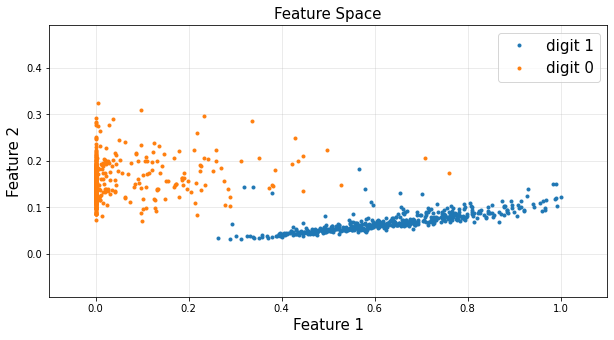

In [38]:
plt.figure(figsize = (10, 5))
plt.title('Feature Space', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'digit 1')
plt.plot(X0[:,0], X0[:,1], '.', label = 'digit 0')
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.axis([-0.1, 1.1, -0.1, 0.5])
plt.legend(fontsize = 15)
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.show()

Classification

 Perceptron

In [39]:
from sklearn import linear_model

clf = linear_model.Perceptron(tol = 1e-3)
clf.fit(X, np.ravel(y))

Perceptron()

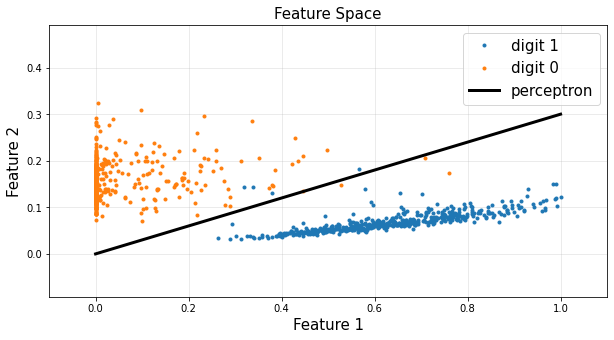

In [40]:
w = np.zeros([3,1])
w[0,0] = clf.intercept_[0]
w[1,0] = clf.coef_[0,0]
w[2,0] = clf.coef_[0,1]

x1p = np.linspace(0,1).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize = (10, 5))
plt.title('Feature Space', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'digit 1')
plt.plot(X0[:,0], X0[:,1], '.', label = 'digit 0')
plt.plot(x1p, x2p, c = 'k', linewidth = 3, label = 'perceptron')
plt.axis('equal')
plt.axis([-0.1, 1.1, -0.1, 0.5])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.show()

SVM

In [41]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(X, np.ravel(y))

SVC(kernel='linear')

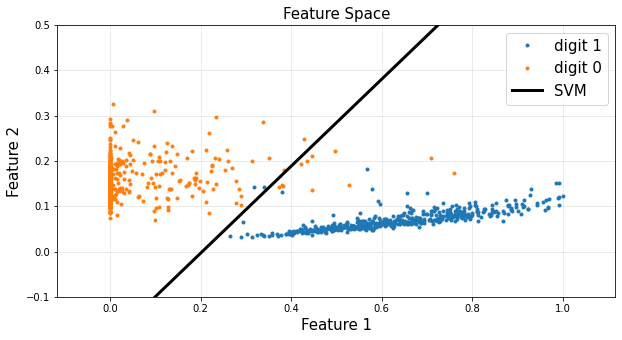

In [42]:
w = np.zeros([3,1])
w[0,0] = clf.intercept_[0]
w[1,0] = clf.coef_[0,0]
w[2,0] = clf.coef_[0,1]

x1p = np.linspace(0,1).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize = (10, 5))
plt.title('Feature Space', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'digit 1')
plt.plot(X0[:,0], X0[:,1], '.', label = 'digit 0')
plt.plot(x1p, x2p, c = 'k', linewidth = 3, label = 'SVM')
plt.axis('equal')
plt.axis([-0.1, 1.1, -0.1, 0.5])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.show()


LogisticRegression

In [43]:
from sklearn import linear_model

clf = linear_model.LogisticRegression(solver = 'lbfgs')
clf.fit(X, np.ravel(y))

LogisticRegression()

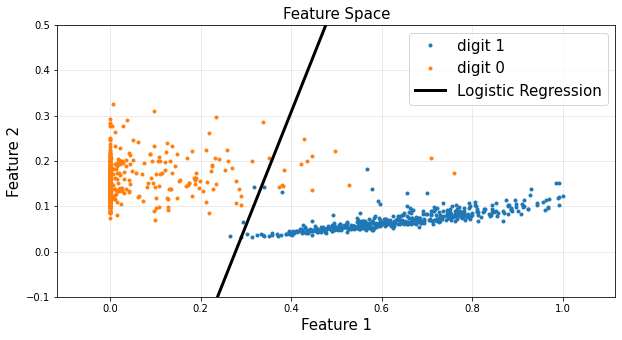

In [44]:
w = np.zeros([3,1])
w[0,0] = clf.intercept_[0]
w[1,0] = clf.coef_[0,0]
w[2,0] = clf.coef_[0,1]

x1p = np.linspace(0,1).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize = (10, 5))
plt.title('Feature Space', fontsize = 15)
plt.plot(X1[:,0], X1[:,1], '.', label = 'digit 1')
plt.plot(X0[:,0], X0[:,1], '.', label = 'digit 0')
plt.plot(x1p, x2p, c = 'k', linewidth = 3, label = 'Logistic Regression')
plt.axis('equal')
plt.axis([-0.1, 1.1, -0.1, 0.5])
plt.grid(alpha = 0.3)
plt.legend(fontsize = 15)
plt.xlabel('Feature 1', fontsize = 15)
plt.ylabel('Feature 2', fontsize = 15)
plt.show()

In [45]:
test_x = digit1[0]

test_feature = np.hstack([np.mean(test_x[12:16,12:16], axis=(0,1)),
                          np.mean(test_x, axis=(0,1))]).reshape(1,-1)

In [46]:
result = clf.predict(test_feature)
print(result[0])

1.0
